# 1.

In [ ]:
%cd /content/first_assignment_audio_processing
!git pull

[Errno 2] No such file or directory: '/content/first_assignment_audio_processing'
/content
fatal: not a git repository (or any of the parent directories): .git


In [2]:
!git clone https://github.com/omertalmi5/first_assignment_audio_processing.git

Cloning into 'first_assignment_audio_processing'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 269 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (269/269), 16.28 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [3]:
%cd /content/first_assignment_audio_processing

/content/first_assignment_audio_processing


In [4]:
# First, install required packages if not already installed
!pip install librosa soundfile

import os
import librosa
import soundfile as sf
from tqdm.notebook import tqdm
import numpy as np

def resample_audio_files(input_directory, output_directory, target_sr=16000):
    """
    Resample all audio files in the input directory to the target sampling rate.

    Parameters:
    -----------
    input_directory : str
        Path to the directory containing the original audio files
    output_directory : str
        Path to save the resampled audio files
    target_sr : int
        Target sampling rate in Hz (default: 16000)
    """

    # Create output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Get list of audio files
    audio_files = [f for f in os.listdir(input_directory)
                   if f.endswith('.wav')]

    for audio_file in tqdm(audio_files):
        try:
            # Load the audio file
            audio_path = os.path.join(input_directory, audio_file)
            y, sampling_rate = librosa.load(audio_path, sr=None)

            if sampling_rate != target_sr:
                y = librosa.resample(y, orig_sr=sampling_rate, target_sr=target_sr)

            output_path = os.path.join(output_directory, f"resampled_{audio_file}")
            sf.write(output_path, y, target_sr)

        except Exception as e:
            print(f"Error processing {audio_file}: {str(e)}")

# Example usage:
input_dir = "/content/first_assignment_audio_processing/Second_Assignment/Recordings"
output_dir = "/content/resampled_recordings"

resample_audio_files(input_dir, output_dir)

  0%|          | 0/90 [00:00<?, ?it/s]

In [5]:
!zip -r /content/resampled_recordings.zip /content/resampled_recordings



  adding: content/resampled_recordings/ (stored 0%)
  adding: content/resampled_recordings/resampled_avital_3.wav (deflated 36%)
  adding: content/resampled_recordings/resampled_nirit_9.wav (deflated 31%)
  adding: content/resampled_recordings/resampled_nirit_0.wav (deflated 22%)
  adding: content/resampled_recordings/resampled_yaron_0.wav (deflated 22%)
  adding: content/resampled_recordings/resampled_bar_3.wav (deflated 39%)
  adding: content/resampled_recordings/resampled_ohad_3.wav (deflated 20%)
  adding: content/resampled_recordings/resampled_ohad_9.wav (deflated 17%)
  adding: content/resampled_recordings/resampled_bar_9.wav (deflated 37%)
  adding: content/resampled_recordings/resampled_rom_8.wav (deflated 22%)
  adding: content/resampled_recordings/resampled_guy_2.wav (deflated 38%)
  adding: content/resampled_recordings/resampled_roni_9.wav (deflated 34%)
  adding: content/resampled_recordings/resampled_neta_4.wav (deflated 37%)
  adding: content/resampled_recordings/resample

# 2.

  0%|          | 0/90 [00:00<?, ?it/s]

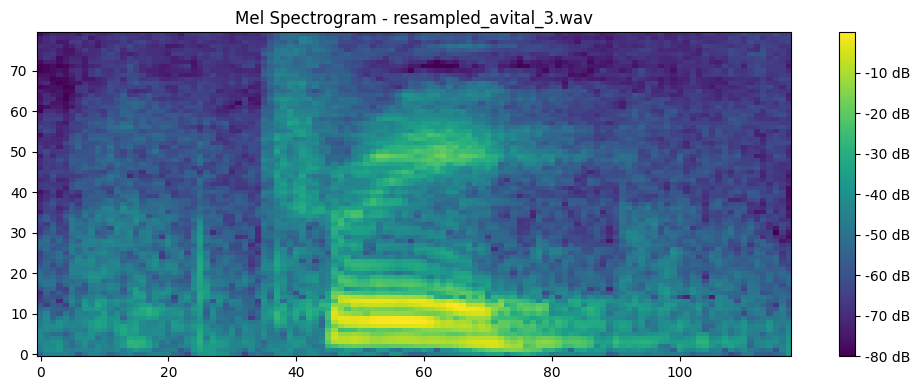

In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

def compute_mel_spectrogram(audio_path, sr=16000):
    """
    Compute Mel spectrogram with 25ms window, 10ms hop, and 80 mel bands
    """
    # Load audio
    y, _ = librosa.load(audio_path, sr=sr)

    # Convert parameters to samples
    n_fft = int(0.025 * sr)  # 25ms window
    hop_length = int(0.010 * sr)  # 10ms hop

    # Compute mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=80  # 80 mel bands
    )

    # Convert to log scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mel_spec_db

def process_directory(input_dir):
    """Process all audio files in directory"""
    spectrograms = {}

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.wav'):
            path = os.path.join(input_dir, filename)
            spectrograms[filename] = compute_mel_spectrogram(path)

    return spectrograms

# Example usage
input_dir = "/content/first_assignment_audio_processing/Second_Assignment/resampled_recordings"
spectrograms = process_directory(input_dir)

# Display sample spectrogram
plt.figure(figsize=(10, 4))
sample_file = list(spectrograms.keys())[0]
plt.imshow(spectrograms[sample_file], aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram - {sample_file}')
plt.tight_layout()
plt.show()

# 3.

a-e


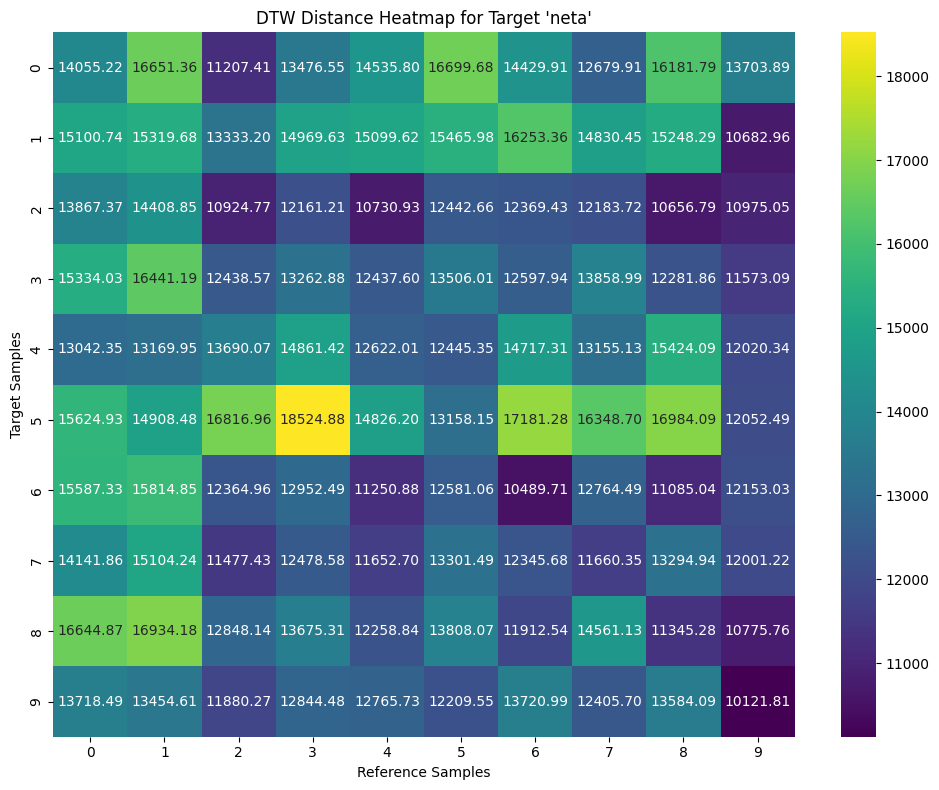

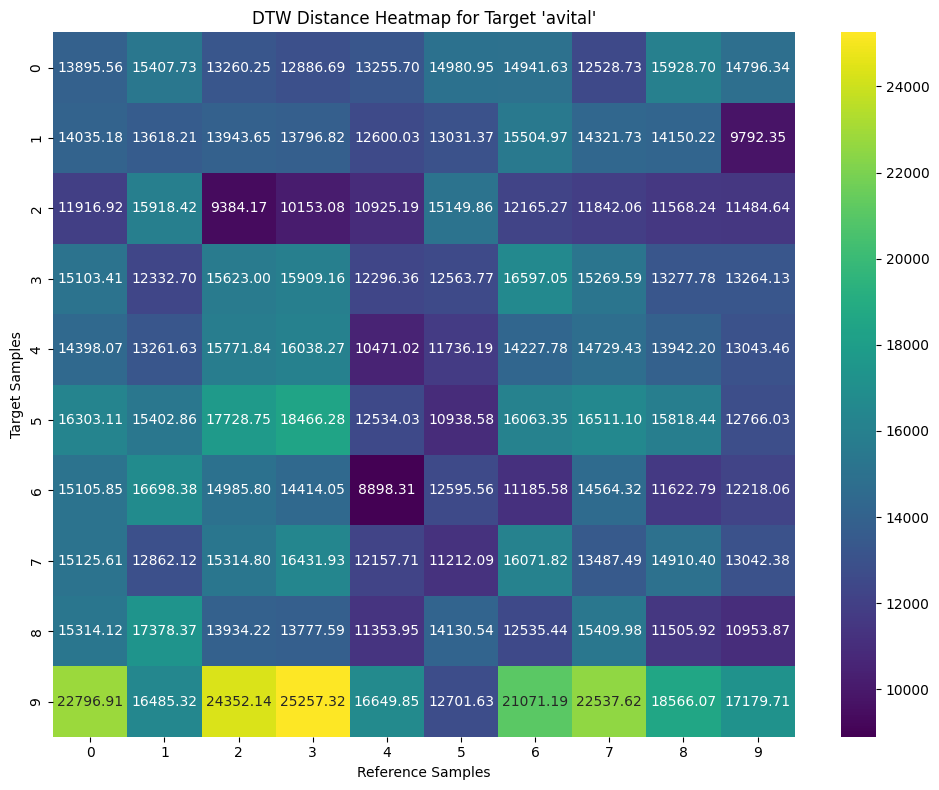

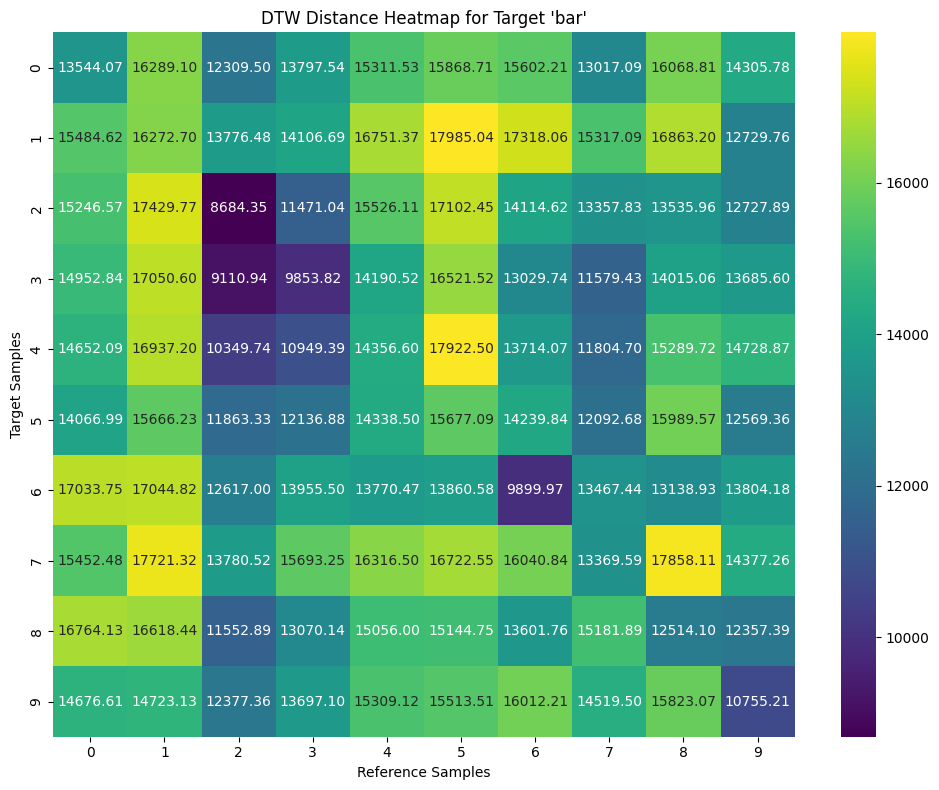

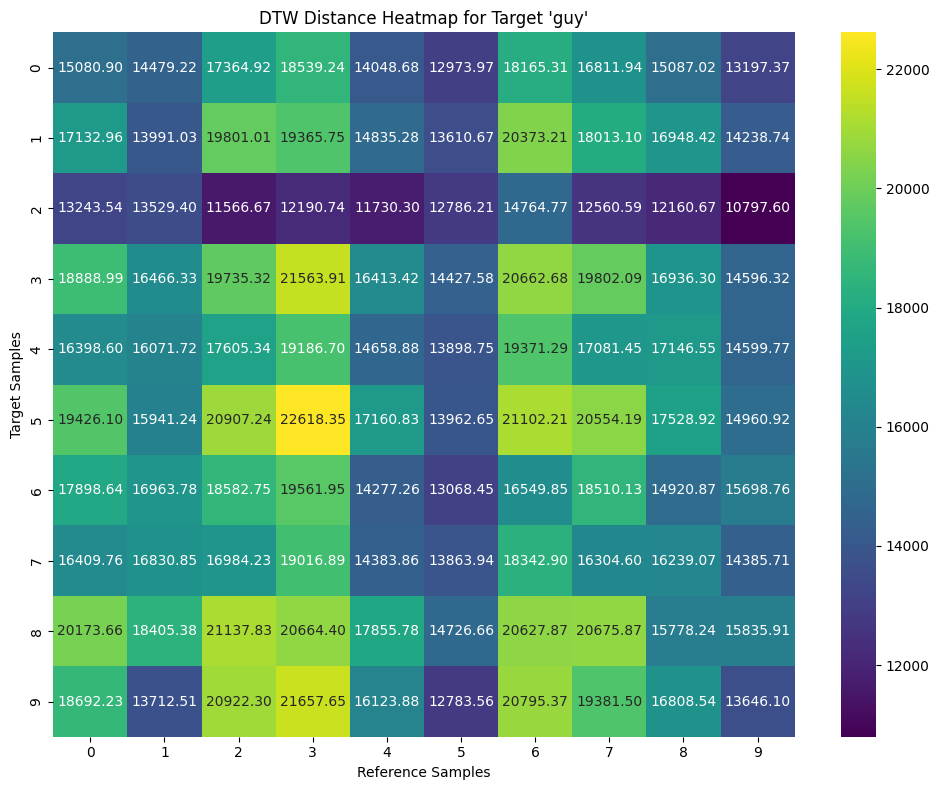

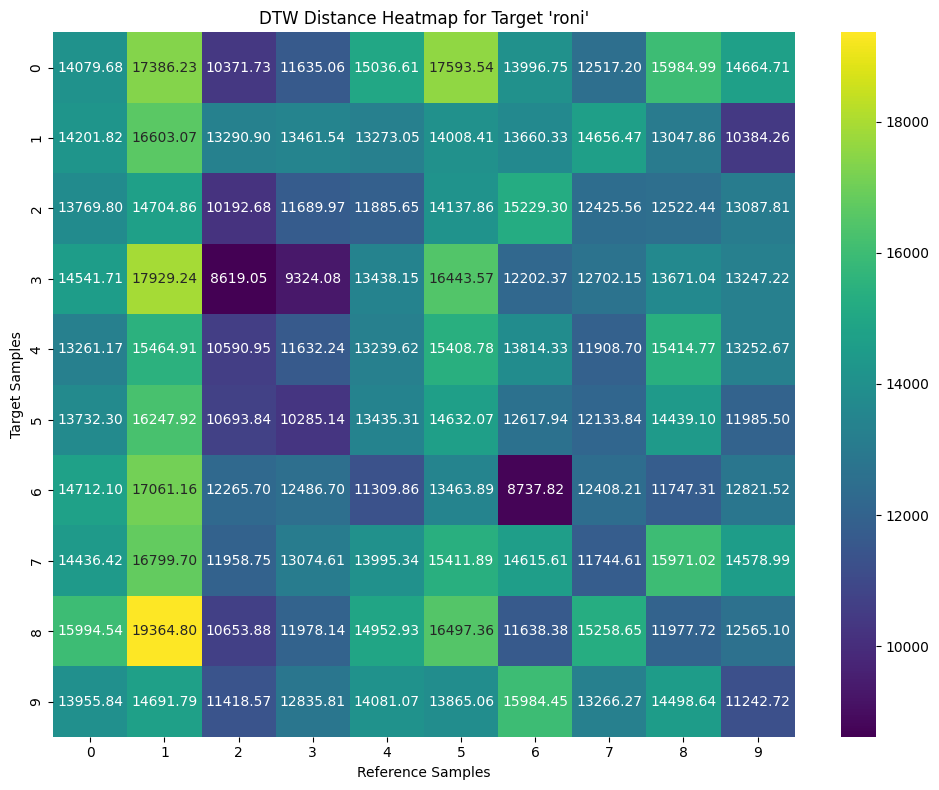

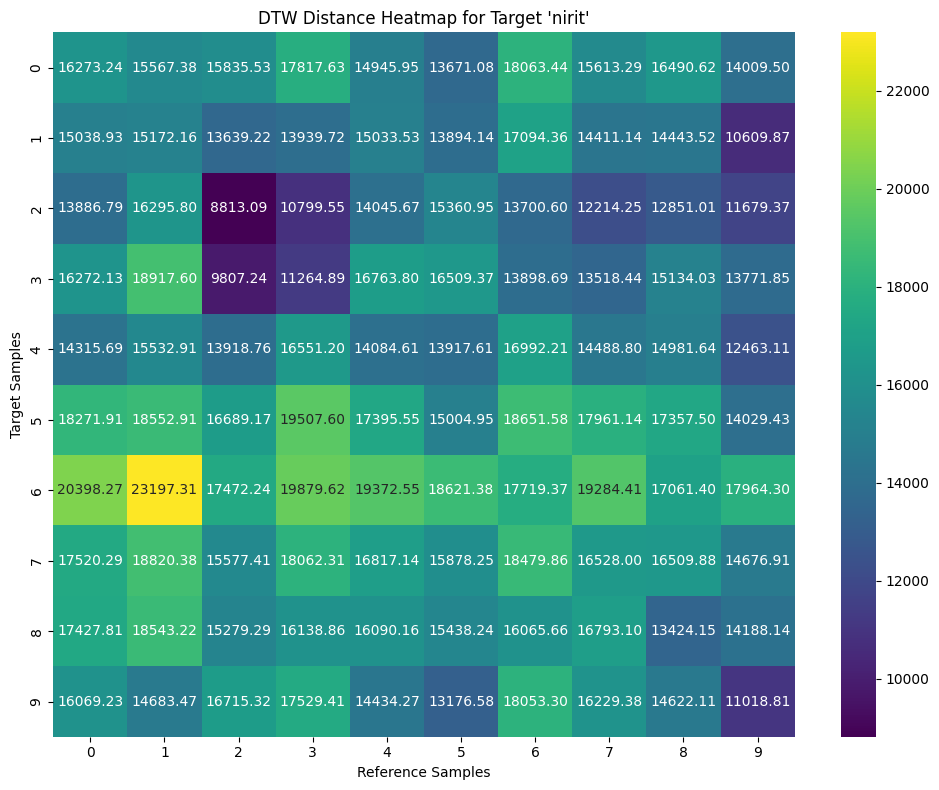

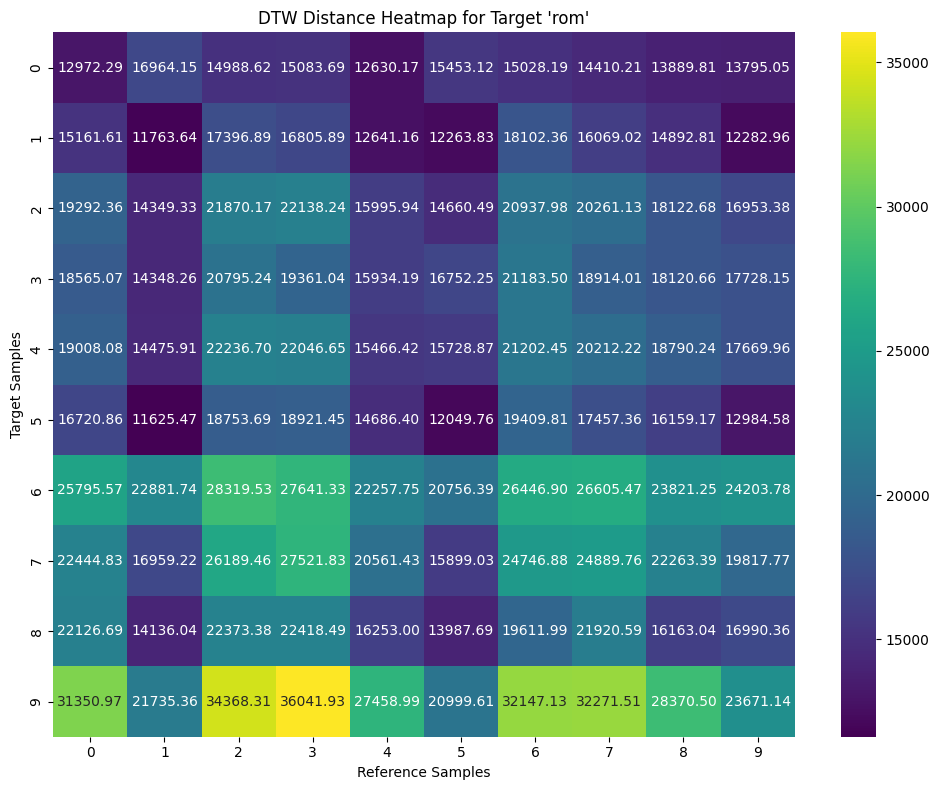

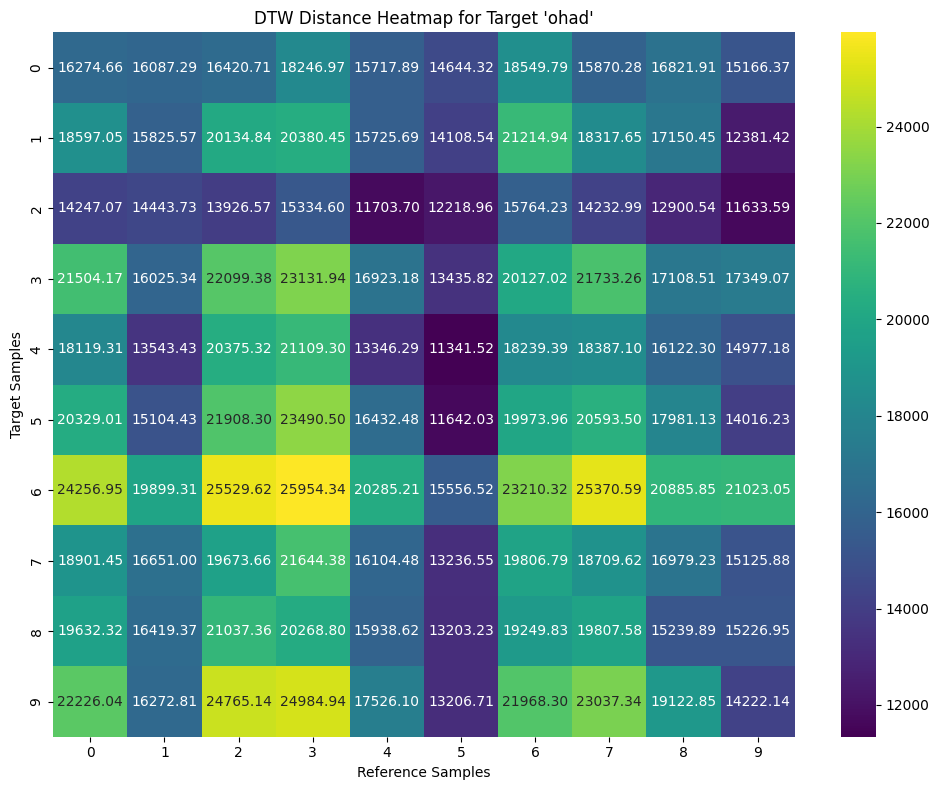

In [6]:
from scipy.spatial.distance import cdist
import numpy as np
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def compute_dtw_distance(mel_spec1, mel_spec2, normalize=False):
    """
    Compute the DTW distance between two Mel spectrograms.

    Parameters:
    mel_spec1, mel_spec2 : np.ndarray
        Mel spectrograms for audio files.
    normalize : bool
        Normalize distances by spectrogram lengths.

    Returns:
    float : DTW distance.
    """
    cost = cdist(mel_spec1.T, mel_spec2.T, metric='euclidean')

    n, m = cost.shape
    dtw = np.full((n + 1, m + 1), np.inf)
    dtw[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            dtw[i, j] = cost[i - 1, j - 1] + min(
                dtw[i - 1, j], dtw[i, j - 1], dtw[i - 1, j - 1]
            )

    distance = dtw[n, m]

    if normalize:
        distance /= (n + m)

    return distance


def plot_dtw_heatmap(distance_matrix, target_name, normalize=False):
    """
    Plot and save a heatmap for DTW distance matrix.

    Parameters:
    -----------
    distance_matrix : np.ndarray
        2D array containing DTW distances.
    target_name : str
        Name of the target audio category.
    normalize : bool
        Indicate whether distances were normalized.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_matrix, annot=True, cmap='viridis', fmt=".2f")
    plt.title(f"DTW Distance Heatmap for Target '{target_name}'" +
              (" (Normalized)" if normalize else ""))
    plt.xlabel("Reference Samples")
    plt.ylabel("Target Samples")
    plt.tight_layout()

    # Save the plot as an image
    plt.savefig(f"dtw_heatmap_{target_name}.png")
    plt.show()



def dtw_distance_matrix(spectrograms, db_speaker, target_speakers, normalize=False):
    """
    Compute DTW distance matrices for audio targets against a reference database.

    Parameters:
    -----------
    mel_dict : dict
        Dictionary containing Mel spectrograms.
    db : str
        Reference database prefix.
    target : list
        Target prefixes for classification.
    normalize : bool
        Normalize the distance values by the path length.

    Returns:
    --------
    distance_matrix : np.ndarray
        4D array containing DTW distances for each target and sample pair.
    """
    # Adjust target and db keys to include the "resampled_" prefix
    prefix = "resampled_"
    distance_matrix = np.zeros((len(target_speakers), 10, 10))

    for x, name in enumerate(target_speakers):
        for i in range(10):
            for j in range(10):
                key_1 = f"{prefix}{name}_{i}.wav"
                key_2 = f"{prefix}{db_speaker}_{j}.wav"

                mel1 = spectrograms[key_1]
                mel2 = spectrograms[key_2]

                distance_matrix[x, i, j] = compute_dtw_distance(mel1, mel2)

                # Normalize if required
                if normalize:
                    distance_matrix[x, i, j] /= (mel1.shape[1] + mel2.shape[1])

        # Plot and save heatmap for each target
        plot_dtw_heatmap(distance_matrix[x], name, normalize)

    return distance_matrix





class_representative = "yaron"
training_set = ["neta", "avital", "bar", "guy"]
evaluation_set = ["roni", "nirit" ,"rom", "ohad"]

class_representative = "yaron"
training_set = ["neta", "avital", "bar", "guy"]



# Compute distance matrix for training set
training_distance_matrix = dtw_distance_matrix(
    spectrograms,
    db_speaker=class_representative,
    target_speakers=training_set
)

evaluation_set = ["roni", "nirit", "rom", "ohad"]

# Compute distance matrix for evaluation set
evaluation_distance_matrix = dtw_distance_matrix(
    spectrograms,
    db_speaker=class_representative,
    target_speakers=evaluation_set
)


# f, g

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def calc_classification_precision(distance_matrix, threshold):
    """
    Calculate precision of the classification using the DTW distance matrix and a threshold.

    Parameters:
    -----------
    distance_matrix : np.ndarray
        Distance matrix of shape (n_speakers, n_training_digits, n_reference_digits)
    threshold : float
        Distance threshold for classification.

    Returns:
    --------
    precision : float
        The classification precision based on the threshold.
    """
    precision_sum = 0
    total_ones = 0

    # Iterate over each speaker's distance matrix
    for speaker_idx, distances in enumerate(distance_matrix):
        # Threshold the distance matrix
        thresholded_matrix = (distances <= threshold).astype(int)

        # Calculate correct classifications (on the diagonal)
        diagonal_sum = np.trace(thresholded_matrix)

        # Calculate total thresholded values (non-zero entries)
        total_ones += np.sum(thresholded_matrix)

        precision_sum += diagonal_sum

    # Calculate precision (diagonal / total thresholded values)
    if total_ones == 0:
        precision = 0
    else:
        precision = precision_sum / total_ones

    return precision


threshold_value = 10500

# Assuming training_dtw_matrix is the computed DTW distance matrix for the training set
precision = calc_classification_precision(training_distance_matrix, threshold_value)
print(f"Classification Precision: {precision:.4f}")

precision = calc_classification_precision(evaluation_distance_matrix, threshold_value)
print(f"Classification Precision: {precision:.4f}")


Classification Precision: 0.5833
Classification Precision: 0.4444


# h.

In [8]:
import librosa
import numpy as np
import soundfile as sf
import os

def compute_moving_average(values, window_size):
    """
    Compute moving average ignoring zero values.
    """
    averaged_values = []
    for i in range(len(values)):
        window = values[max(0, i - window_size + 1): i + 1]
        non_zero_window = [val for val in window if val != 0]
        averaged_values.append(np.mean(non_zero_window) if non_zero_window else 0)
    return np.array(averaged_values)


def normalize_audio_gain(audio, target_rms):
    """
    Normalize audio to a target RMS level using adaptive gain adjustment.
    """
    current_rms = np.sqrt(np.mean(audio ** 2))
    if current_rms > 0:
        gain_factor = target_rms / current_rms
        audio *= gain_factor
    return np.clip(audio, -1.0, 1.0)


def process_audio_segment(file_path, save_path, target_rms=0.035):
    """
    Apply AGC to a single audio segment and save the processed output.
    """
    sample_rate = 16000
    try:
        # Load audio file and resample if needed
        audio, sr = librosa.load(file_path, sr=sample_rate)

        # Compute short-term RMS and apply gain normalization
        hop_length = int(0.01 * sample_rate)  # 10ms hop size
        rms_values = librosa.feature.rms(y=audio, hop_length=hop_length)[0]
        smoothed_rms = compute_moving_average(rms_values, window_size=50)

        # Calculate and apply gain adjustments
        gain_factors = np.clip(target_rms / (smoothed_rms + 1e-8), 0.1, 10)
        adjusted_audio = audio * np.interp(np.arange(len(audio)),
                                           np.linspace(0, len(audio), len(gain_factors)),
                                           gain_factors)

        # Remove silent sections
        processed_audio, _ = librosa.effects.trim(adjusted_audio, top_db=20)

        # Save normalized audio
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        sf.write(save_path, processed_audio, sample_rate)
        print(f"Processed audio saved: {save_path}")

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


def normalize_all_audio_segments():
    """
    Apply AGC to all audio files and save normalized outputs.
    """
    speakers = ["bar", "neta", "avital", "yaron", "guy", "roni", "nirit", "rom", "ohad"]
    input_dir = "/content/first_assignment_audio_processing/Second_Assignment/Recordings"
    output_dir = "/content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc"

    for speaker in speakers:
        for digit in range(10):
            input_path = os.path.join(input_dir, f"{speaker}_{digit}.wav")
            output_path = os.path.join(output_dir, f"resampled_{speaker}_{digit}.wav")
            process_audio_segment(input_path, output_path)


# Start normalization process for all audio files
normalize_all_audio_segments()


Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_0.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_1.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_2.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_3.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_4.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_5.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc/resampled_bar_6.wav
Processed audio saved: /content/first_assignment_audio_processing/Second_Assignment/resampled_rec

  0%|          | 0/90 [00:00<?, ?it/s]

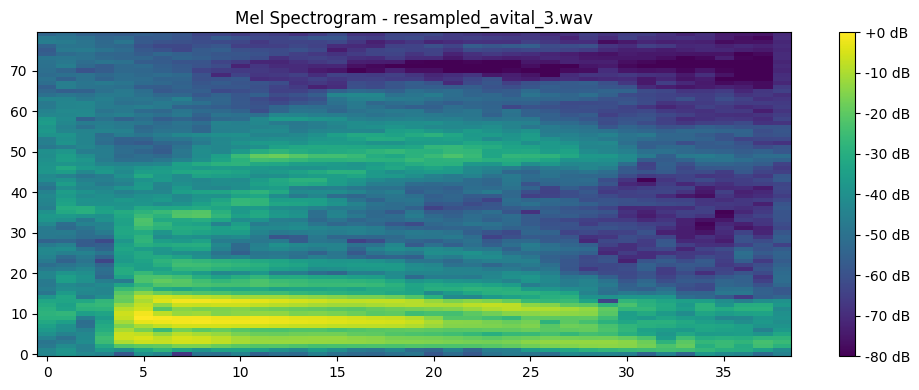

In [9]:
# Example usage
input_dir = "/content/first_assignment_audio_processing/Second_Assignment/resampled_recordings_agc"
spectrograms = process_directory(input_dir)

# Display sample spectrogram
plt.figure(figsize=(10, 4))
sample_file = list(spectrograms.keys())[0]
plt.imshow(spectrograms[sample_file], aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram - {sample_file}')
plt.tight_layout()
plt.show()

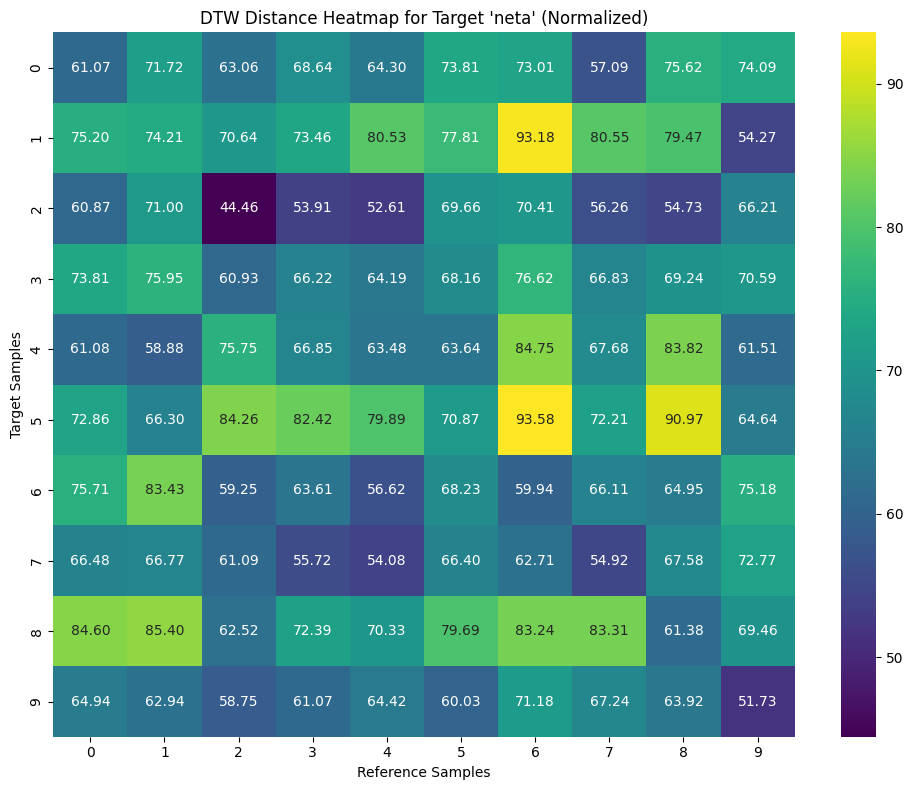

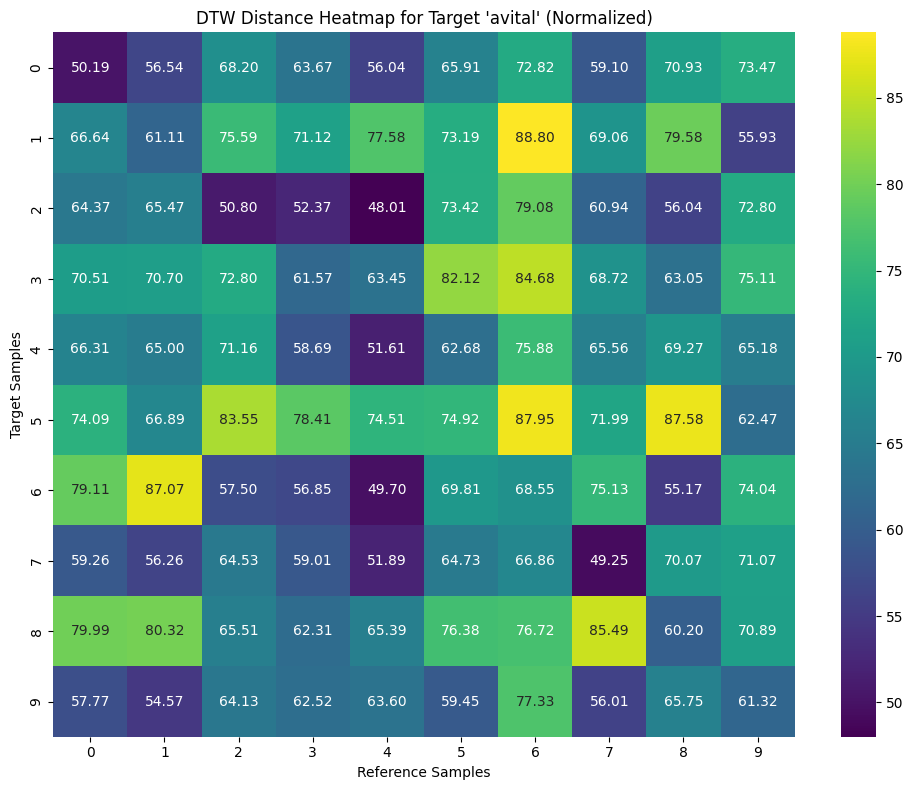

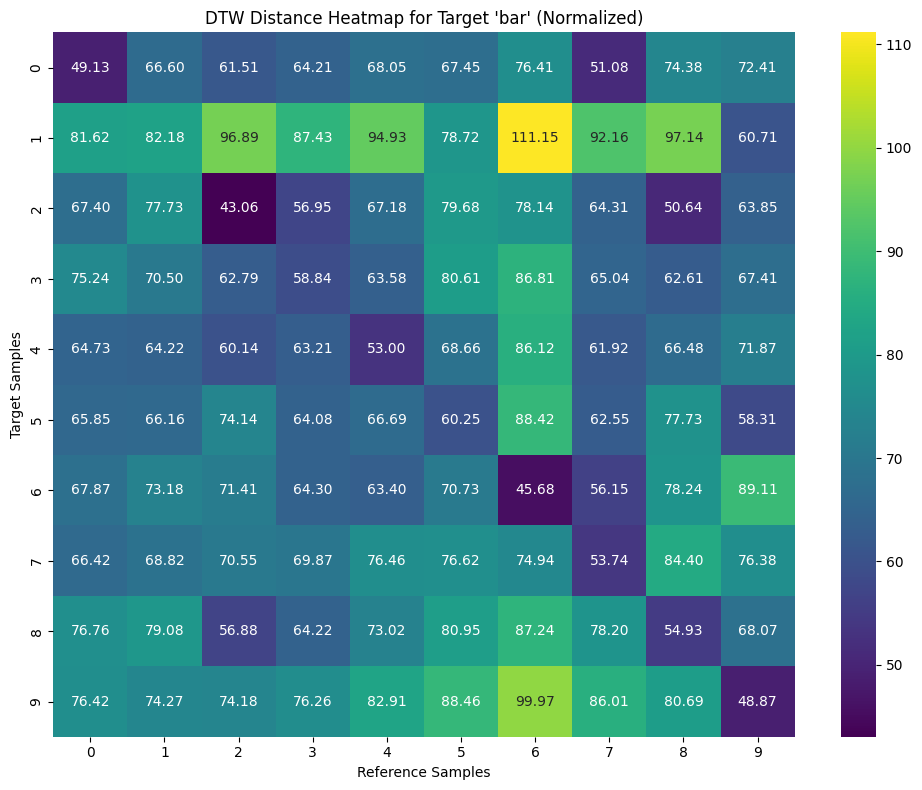

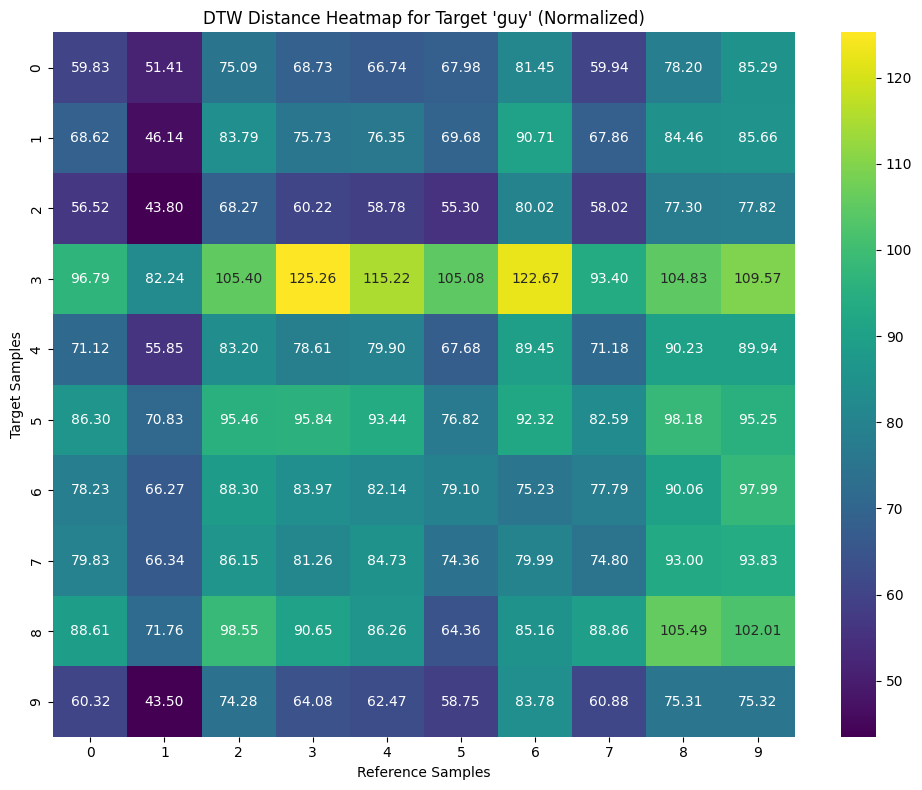

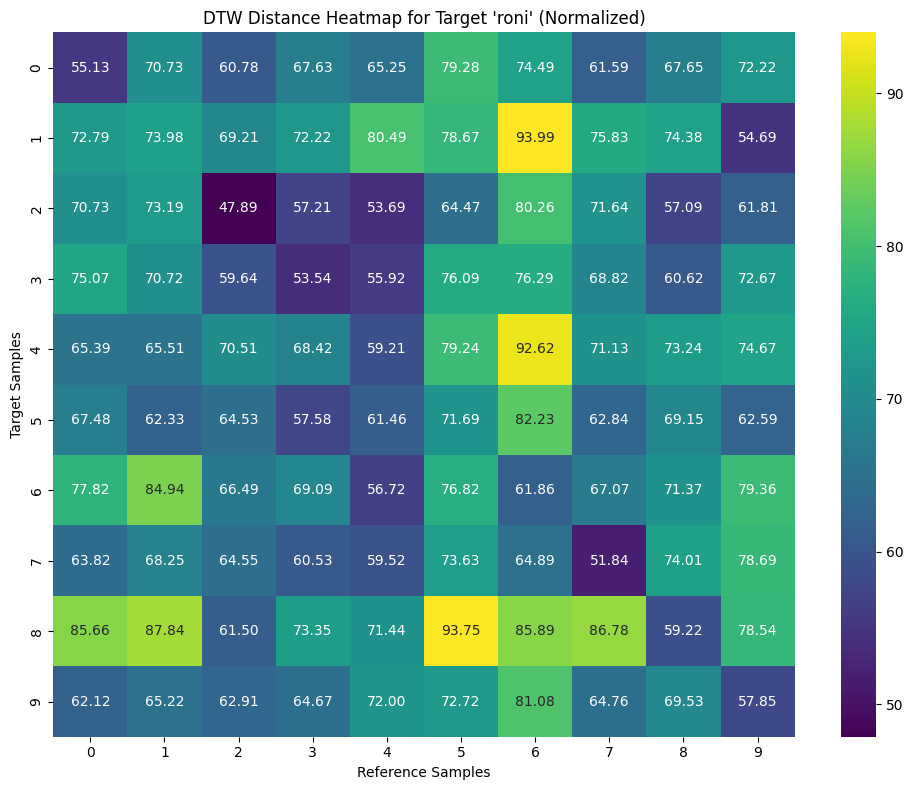

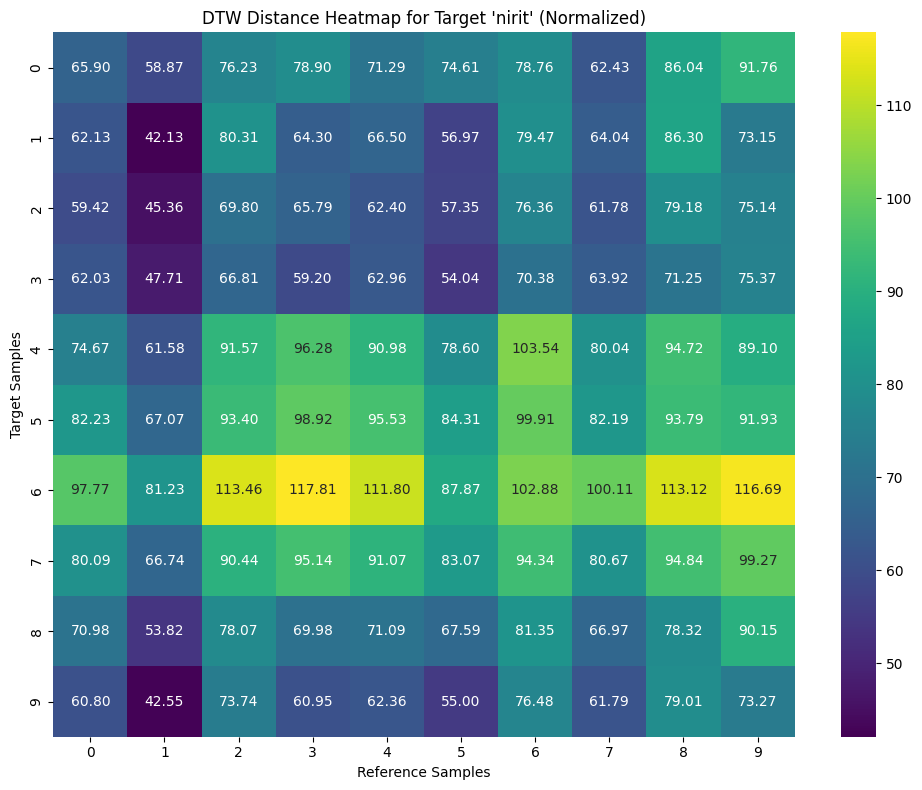

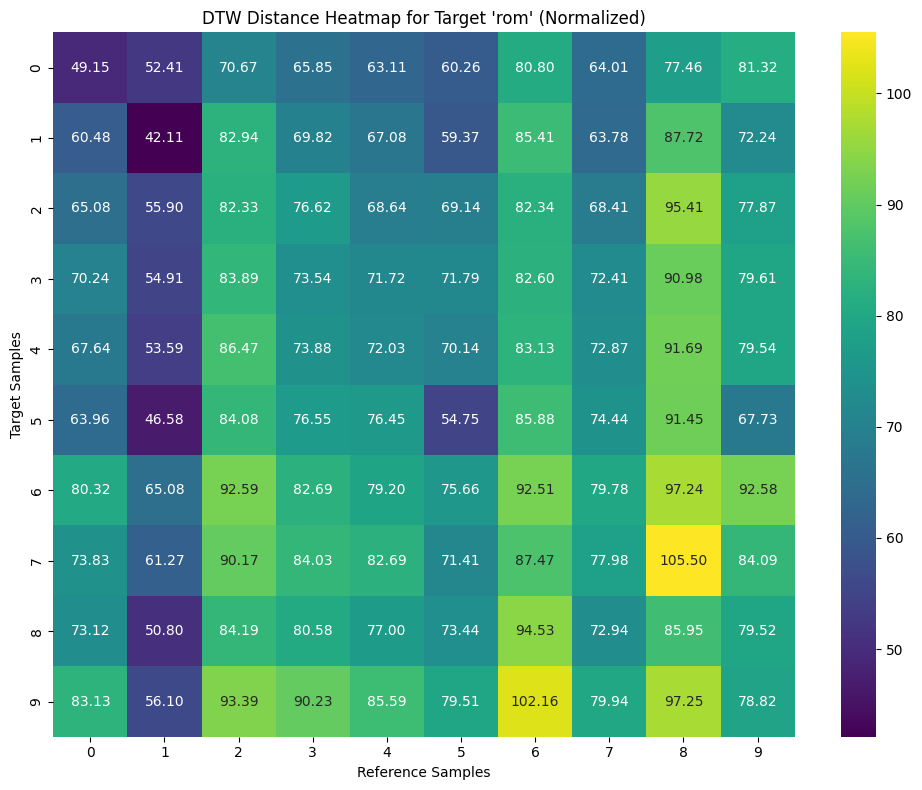

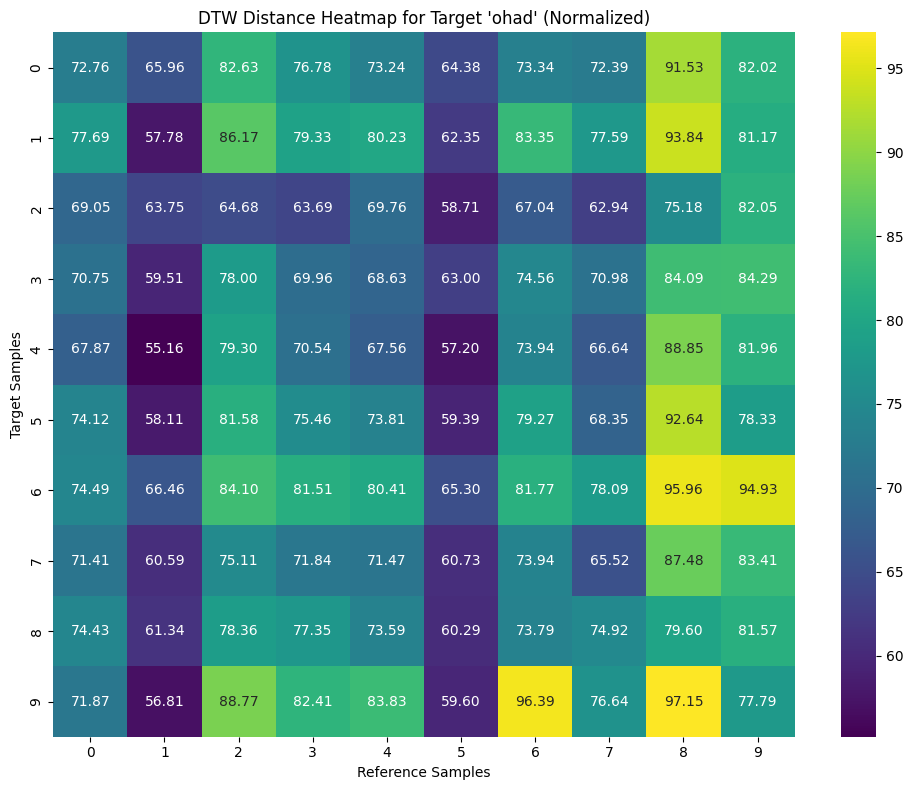

In [10]:
# Compute distance matrix for training set
training_distance_matrix = dtw_distance_matrix(
    spectrograms,
    db_speaker=class_representative,
    target_speakers=training_set,
    normalize=True
)



# Compute distance matrix for evaluation set
evaluation_distance_matrix = dtw_distance_matrix(
    spectrograms,
    db_speaker=class_representative,
    target_speakers=evaluation_set,
    normalize=True
)

In [11]:
threshold_value = 50

# Assuming training_dtw_matrix is the computed DTW distance matrix for the training set
precision = calc_classification_precision(training_distance_matrix, threshold_value)
print(f"Classification Precision: {precision:.4f}")

precision = calc_classification_precision(evaluation_distance_matrix, threshold_value)
print(f"Classification Precision: {precision:.4f}")

Classification Precision: 0.6364
Classification Precision: 0.5000


# 4.

In [11]:
def collapse_sequence(seq):
    result = []
    prev_char = None
    for char in seq:
        if char != prev_char and char != '^':  # Ignore blanks and duplicates
            result.append(char)
        prev_char = char
    return result


#5.

In [7]:
import numpy as np

# Prediction matrix
pred = np.zeros((5, 3), dtype=np.float32)
pred[0] = [0.8, 0.2, 0.0]
pred[1] = [0.2, 0.8, 0.0]
pred[2] = [0.3, 0.7, 0.0]
pred[3] = [0.09, 0.8, 0.11]
pred[4] = [0.0, 0.0, 1.0]

# Alphabet label mapping
alphabet = {0: 'a', 1: 'b', 2: '^'}  # ^ is blank

# Target sequence "aba"
# Collapsed target with blanks: ^a^b^a^
expanded_target = [2, 0, 2, 1, 2, 0, 2]  # Indices for '^', 'a', '^', 'b', '^', 'a', '^'

def forward_ctc(pred, target):
    """
    Computes the forward probability using the CTC forward algorithm.
    Args:
        pred (np.array): Probability matrix of shape (T, C) where T is the number of time steps
                         and C is the number of classes (includes blank).
        target (list): Expanded target sequence with blanks included (e.g., '^a^b^a^').
    Returns:
        float: The total probability of the sequence.
    """
    T, C = pred.shape  # Time steps and number of classes
    L = len(target)    # Length of the expanded target sequence

    # Initialize alpha matrix
    alpha = np.zeros((T, L), dtype=np.float32)

    # Initialize at time step 0
    alpha[0, 0] = pred[0, target[0]]  # First blank
    alpha[0, 1] = pred[0, target[1]]  # First target character 'a'

    # Forward computation
    for t in range(1, T):  # Iterate over time steps
        for s in range(L):  # Iterate over states in the target sequence
            # Transition from the same state
            alpha[t, s] += alpha[t - 1, s]

            # Transition from the previous state (diagonal transition)
            if s > 0:
                alpha[t, s] += alpha[t - 1, s - 1]

            # Skip transition (e.g., blank to target)
            if s > 1 and target[s] != target[s - 2]:
                alpha[t, s] += alpha[t - 1, s - 2]

            # Multiply by the probability of the current label
            alpha[t, s] *= pred[t, target[s]]

    # Sum the probabilities of the final two states
    return alpha[-1, -1] + alpha[-1, -2]

# Calculate the probability
sequence_prob = forward_ctc(pred, expanded_target)
print(f"Probability of the sequence 'aba': {sequence_prob}")


Probability of the sequence 'aba': 0.08880001306533813


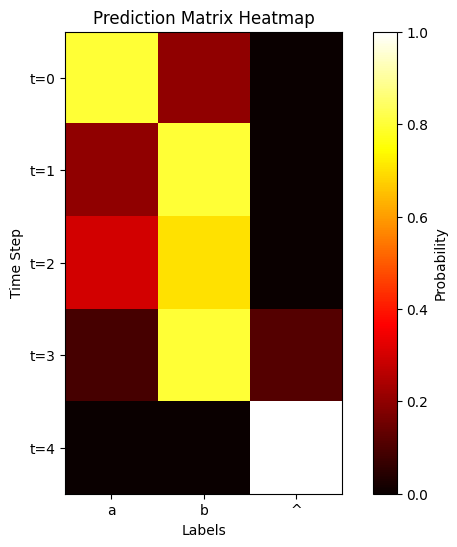

In [8]:
import matplotlib.pyplot as plt

# Plot the prediction matrix
def plot_pred_matrix(pred, alphabet):
    """
    Plots the prediction matrix with label mappings.
    Args:
        pred (np.array): Prediction matrix of shape (T, C).
        alphabet (dict): Mapping of label indices to characters.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(pred, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Probability")
    plt.xticks(ticks=np.arange(len(alphabet)), labels=[alphabet[i] for i in range(len(alphabet))])
    plt.yticks(ticks=np.arange(pred.shape[0]), labels=[f"t={i}" for i in range(pred.shape[0])])
    plt.xlabel("Labels")
    plt.ylabel("Time Step")
    plt.title("Prediction Matrix Heatmap")
    plt.show()

plot_pred_matrix(pred, alphabet)

# Question 6

In [9]:
def forward_ctc_max(pred, target):
    T, C = pred.shape
    L = len(target)

    alpha = np.zeros((T, L), dtype=np.float32)
    backtrace = np.zeros((T, L), dtype=int)

    alpha[0, 0] = pred[0, target[0]]
    alpha[0, 1] = pred[0, target[1]]

    for t in range(1, T):
        for s in range(L):
            max_prob, prev_state = alpha[t - 1, s], s

            if s > 0 and alpha[t - 1, s - 1] > max_prob:
                max_prob, prev_state = alpha[t - 1, s - 1], s - 1

            if s > 1 and target[s] != target[s - 2] and alpha[t - 1, s - 2] > max_prob:
                max_prob, prev_state = alpha[t - 1, s - 2], s - 2

            alpha[t, s] = max_prob * pred[t, target[s]]
            backtrace[t, s] = prev_state

    final_probs = [alpha[-1, -1], alpha[-1, -2]]
    final_state = -1 if final_probs[0] >= final_probs[1] else -2
    max_prob = final_probs[0] if final_state == -1 else final_probs[1]

    path = []
    s = final_state + L
    for t in reversed(range(T)):
        path.append(s)
        s = backtrace[t, s]

    return max_prob, backtrace, list(reversed(path))


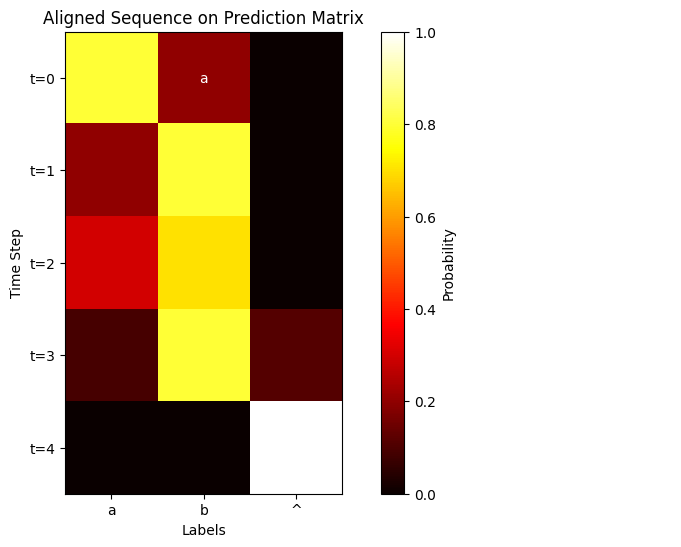

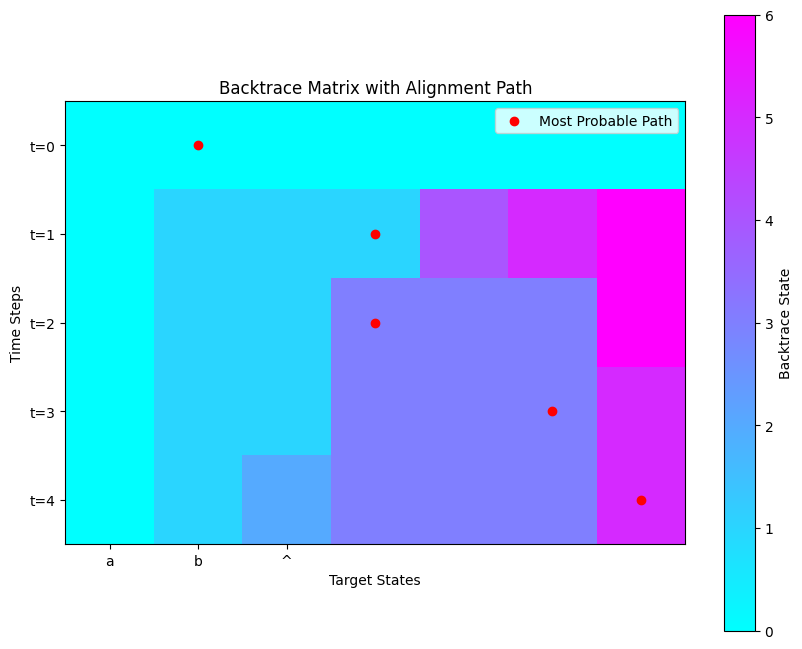

Most probable path probability: 0.04032000154256821
Most probable path: [1, 3, 3, 5, 6]


In [10]:
max_prob, backtrace, path = forward_ctc_max(pred, expanded_target)

def plot_aligned_sequence(pred, path, expanded_target, alphabet):
    plt.figure(figsize=(10, 6))
    plt.imshow(pred, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Probability")
    plt.xticks(ticks=np.arange(len(alphabet)), labels=[alphabet[i] for i in alphabet])
    plt.yticks(ticks=np.arange(pred.shape[0]), labels=[f"t={i}" for i in range(pred.shape[0])])
    plt.xlabel("Labels")
    plt.ylabel("Time Step")
    plt.title("Aligned Sequence on Prediction Matrix")

    for t, s in enumerate(path):
        label = alphabet[expanded_target[s]]
        plt.text(s, t, label, color="white", ha="center", va="center")

    plt.show()

plot_aligned_sequence(pred, path, expanded_target, alphabet)

def plot_backtrace(backtrace, path, pred, alphabet):
    plt.figure(figsize=(10, 8))
    plt.imshow(backtrace, cmap="cool", interpolation="nearest")
    plt.colorbar(label="Backtrace State")
    plt.title("Backtrace Matrix with Alignment Path")
    plt.xlabel("Target States")
    plt.ylabel("Time Steps")

    for t, s in enumerate(path):
        plt.scatter(s, t, color="red", label="Most Probable Path" if t == 0 else "")

    plt.xticks(ticks=np.arange(len(alphabet)), labels=[alphabet[i] for i in alphabet])
    plt.yticks(ticks=np.arange(pred.shape[0]), labels=[f"t={i}" for i in range(pred.shape[0])])
    plt.legend()
    plt.show()

plot_backtrace(backtrace, path, pred, alphabet)


print(f"Most probable path probability: {max_prob}")
print(f"Most probable path: {path}")

#7.

In [12]:
%cd /content/first_assignment_audio_processing

/content/first_assignment_audio_processing


In [25]:
import pickle as pkl

# Load the data
with open('Second_Assignment/force_align.pkl', 'rb') as f:
    data = pkl.load(f)



In [28]:
def create_expanded_target(text, labels):
    """
    Creates the expanded target sequence with blanks for CTC alignment.

    Args:
        text (str): The string to be expanded (e.g., "aba").
        labels (dict): A dictionary mapping characters to their indices (e.g., {'a': 0, 'b': 1, '^': 2}).

    Returns:
        list: The expanded target sequence as a list of indices.
    """
    expanded_target = [labels['^']]  # Start with a blank symbol
    for char in text:
        expanded_target.append(labels[char])  # Add the character's index
        expanded_target.append(labels['^'])  # Add a blank symbol after each character
    return expanded_target

labels = {v: k for k, v in data['label_mapping'].items()}
text_to_align = data['text_to_align']
expanded_target = create_expanded_target(text_to_align, labels)


In [29]:
max_prob, backtrace, path = forward_ctc_max(data['acoustic_model_out_probs'], expanded_target)

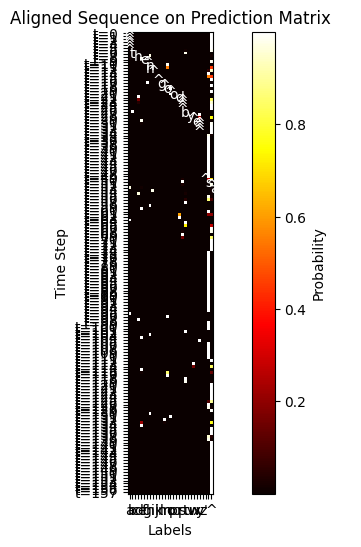

In [30]:
plot_aligned_sequence(data['acoustic_model_out_probs'], path, expanded_target, data['label_mapping'])

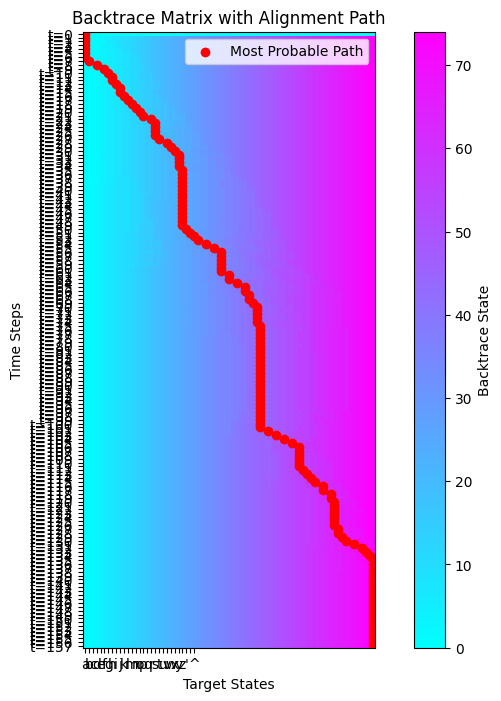

In [32]:
plot_backtrace(backtrace, path, data['acoustic_model_out_probs'], data['label_mapping'])